## Task:
-  Build a model that predicts the rating of a movie based on features, use regression techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                       ## For plotting graphs
import seaborn as sns                                 ## Data Visualization Library
import random
from sklearn.preprocessing import LabelEncoder        ## Convert categorical labels into numeric labels
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      ## Library for standardizing the features (scaling)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score ## Performance parameters
from sklearn.model_selection import learning_curve                           ## Drawing the learning curve
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from pycaret.regression import *                                             ## Displays the comparison between various models

In [2]:
# Using an exception handling technique 
try:
    data = pd.read_csv('movies.csv', encoding='utf-8')   # Load the dataset with UTF-8 encoding 
except UnicodeDecodeError:
    
    data = pd.read_csv('movies.csv', encoding='latin1') # Try a different encoding
    
df = pd.DataFrame(data) # Creating a dataframe of the movies.csv file loaded in the data variable
df 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [5]:
# Counting the number of null values in each column
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Data Preprocessing

In [6]:
df.drop(['Name'],axis=1,inplace=True)
# Dropping Name as it is unique and does not provide much significance in predicting rating
# Dropping Votes as too many missing values to fill and will not be give accurate analysis.

In [7]:
df['Votes'] = df['Votes'].str.replace(r'\D', '', regex=True).astype(float)
df['Votes']=df['Votes'].fillna(df['Votes'].median()) 
df['Votes'] =np.round(df['Votes']).astype(int)

In [8]:
# Removing the null values from year column and removing the negative sign, converting to int datatype
df.dropna(subset=["Year"],inplace=True)
df['Year'] = (df['Year'])*-1
df['Year'] = np.round(df['Year']).astype(int)

In [9]:
# Removing special symbols from duration and filling with the mean duration
df['Duration'] = df['Duration'].str.replace(r'\D', '', regex=True).astype(float)
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())
df['Duration'] = np.round(df['Duration']).astype(int)

In [10]:
# Randomly choosing one genre from the list of genres in each movie row
def random_genre(genres):
    if pd.isna(genres):
        return genres
    genre_list = genres.split(',')
    return random.choice(genre_list).strip()

df['Genre'] = df['Genre'].apply(random_genre) # Apply the transformation to the Genre column

In [11]:
# Dropping the null values from the Genre and Director column
df.dropna(subset=["Genre","Director"],inplace=True)

In [12]:
# Filling the Rating with the median and rounding it to two decimal places
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Rating'] = np.round(df['Rating'],2).astype(float)

In [13]:
# Arranging the dataset into ascending order using the Year and Duration Columns
df.sort_values(by=["Year","Duration"],ascending=[True,True],inplace=True)

In [14]:
# Handle missing actors *Keeping only two Actors per movie for better representation

# Filling Actor 1 with Actor 3 if Actor 1 is null else Filling Actor 2 with Actor 3 if Actor 2 is null 
def fill_missing_actors(row):
    if pd.isna(row['Actor 1']):
        if pd.isna(row['Actor 2']):
            if pd.isna(row['Actor 3']):
                return None  
            else:
                return row['Actor 3']
        else:
            return row['Actor 2']
    return row['Actor 1']

df['Actor 1'] = df.apply(fill_missing_actors, axis=1)
df['Actor 2'] = df.apply(lambda row: row['Actor 3'] if pd.isna(row['Actor 2']) else row['Actor 2'], axis=1)

# Drop movies where all actors are missing
df.dropna(subset=['Actor 1'], inplace=True)

In [15]:
# Drop the column of actor 3
df.drop(['Actor 3'],axis=1,inplace=True)

# Drop movies where actor 1 and actor 2 are the same or actor 2 has null values
df = df[(df['Actor 1'] != df['Actor 2']) & (~pd.isna(df['Actor 2']))]

In [16]:
df.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
dtype: int64

In [17]:
## Finding the number of missing values 
missing_values = df.isna().sum().sum()
print("Total Missing Values:", missing_values)

Total Missing Values: 0


In [18]:
df=df.drop_duplicates()

In [19]:
# Count the total number of duplicate values 
df.duplicated().sum()

0

In [20]:
df.nunique()

Year          94
Duration     178
Genre         23
Rating        84
Votes       2028
Director    4787
Actor 1     4002
Actor 2     4413
dtype: int64

#### Observations:
- There are 22 unique Genres
- 4787 Directors in the industry
- 8415 Actors in the industry

In [21]:
# Dropping the index from the dataset
df = df.reset_index(drop=True)

In [22]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2
0,1917,128,Adventure,6.7,22,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde
1,1928,128,Action,6.0,55,Vishnupant Govind Damle,Sheikh Fattelal,Keshavrao Dhaiber
2,1931,120,Musical,6.0,55,J.J. Madan,Nissar,Jehanara Kajjan
3,1931,124,Drama,5.3,6,Bhagwati Prasad Mishra,Khalil,Ermeline
4,1931,124,Drama,6.2,112,Ardeshir Irani,Master Vithal,Zubeida
...,...,...,...,...,...,...,...,...
11566,2022,128,Comedy,6.0,55,Luv Ranjan,Ranbir Kapoor,Shraddha Kapoor
11567,2022,128,Romance,6.0,55,Praween Kumar Pandey,Dharmendra Ahirwar,Sanit Swami
11568,2022,128,Drama,6.0,55,Parvinder Singh Wraich,Harkiran Kaur Wraich,Vinamarjot Singh Wraich
11569,2022,128,Action,6.0,55,Ravi Udyawar,Malavika Mohanan,Siddhant Chaturvedi


In [23]:
# Saving the preprocessed dataset into a new csv file
file_path = "movies output.csv"
df.to_csv(file_path, index=True)

## Data Visualization

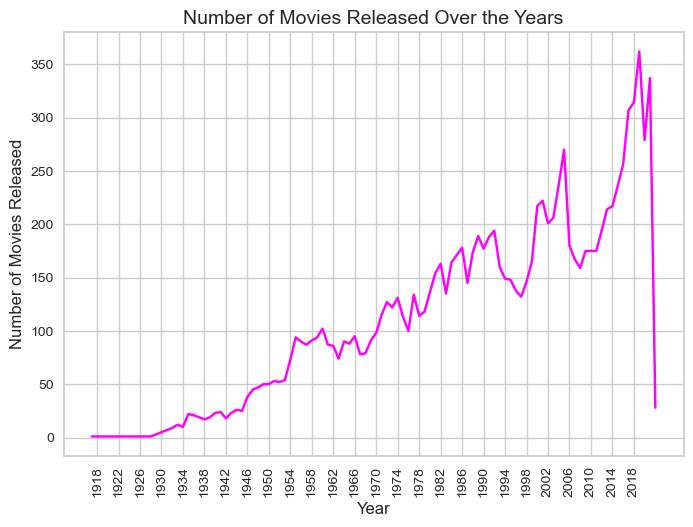

In [24]:
# Grouping movies by year and counting the movies for each year
movies_by_year = df.groupby('Year').size()
plt.plot(movies_by_year.index, movies_by_year.values,color='magenta')
plt.title('Number of Movies Released Over the Years', fontsize = 14)
plt.xlabel('Year', fontsize =12)
plt.xticks(range(1918, 2022, 4),rotation=90)
plt.ylabel('Number of Movies Released', fontsize= 12)
plt.show()

#### Observations:
- In the Century from 1918 to 2018 the number of movies released have greatly increased.

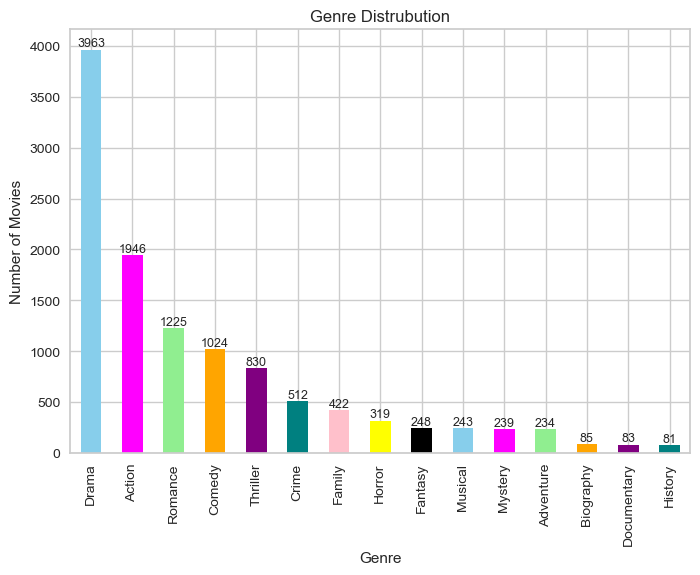

In [25]:
# Representing the top 15 Genres
Genre1 = df['Genre'].value_counts().sort_values(ascending=False).head(15)
colors = ['skyblue', 'magenta', 'lightgreen', 'orange', 'purple', 'teal', 'pink', 'yellow','black']
ax=Genre1.plot(kind='bar',color=colors)
plt.title("Genre Distrubution")
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

# Annotate the bars with the values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge',size=9)

plt.show()

#### Observations:
- The highest number of movies have Genre: Drama, followed by Action, Romance, Comedy,Thriller

In [26]:
# Making a dataframe of year and genre
data = pd.DataFrame({
    'Year':df['Year'],
    'Genre':df['Genre'] })

# Filtering the Movies for the year of release to be after 2000 
data= data[data['Year'] >= 2000]
genre_counts = data['Genre'].value_counts()  # Counting the number of movies per genre after filtering

genres = genre_counts[genre_counts > 100 ].index           # Filter genres to include only those with counts greater than 100
data = data[data['Genre'].isin(genres)]
genre_counts = data.groupby(['Year', 'Genre']).size().unstack(fill_value=0) # Count the number of movies per genre per year

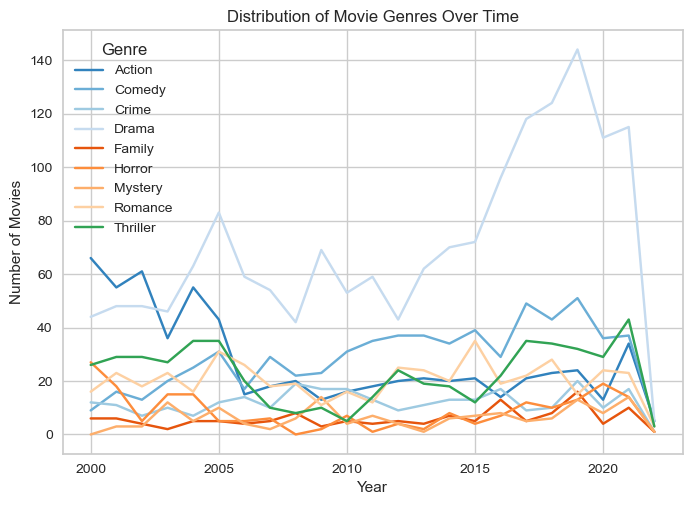

In [27]:
# Plotting the line graph for Distribution of Movie Genres Over Time
sns.set_palette("tab20c",10)
genre_counts.plot(kind='line')
plt.title('Distribution of Movie Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.show()

#### Observations:
- Drama Movies had an increase around 2005 and a great increase after 2015 and a slight drop between 2017 to 2020
- Action movies have seen a drop since 2000, then attained a steady number around 2005
- Romance movies have steady incraese and decrease over the years
- Comedy movies are increasing slightly across the years.

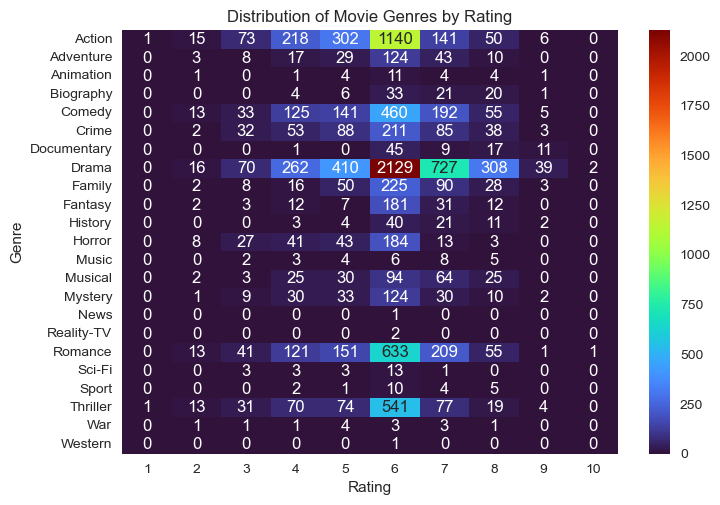

In [28]:
# Make dataframe of genre and rating
data = pd.DataFrame({
    'Genre':df['Genre'],
    'Rating':df['Rating']
})

data['Rating'] = data['Rating'].round(0) # Rounding the ratings to whole numbers

# Create a pivot table to count the number of movies per genre per rating
genre_rating_counts = data.pivot_table(index='Genre', columns='Rating', aggfunc='size', fill_value=0)

all_ratings = list(range(1, 11)) # Reindex to ensure all ratings from 1 to 10 are present
genre_rating_counts = genre_rating_counts.reindex(columns=all_ratings, fill_value=0)

# Plotting the heatmap of Distribution of Movie Genres by Rating
sns.heatmap(genre_rating_counts, annot=True, fmt="d",cmap="turbo")
plt.title('Distribution of Movie Genres by Rating')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()

#### Observations:
- The weighted average Rating of Action movies is around: 5.6
- The weighted average Rating of Comedy movies is around: 5.8
- The weighted average Rating of Crime movies is around:  5.8
- The weighted average Rating of Drama movies is around:  6
- The weighted average Rating of Romance movies is around:5.9
- The weighted average Rating of Thriller movies is around:5.5

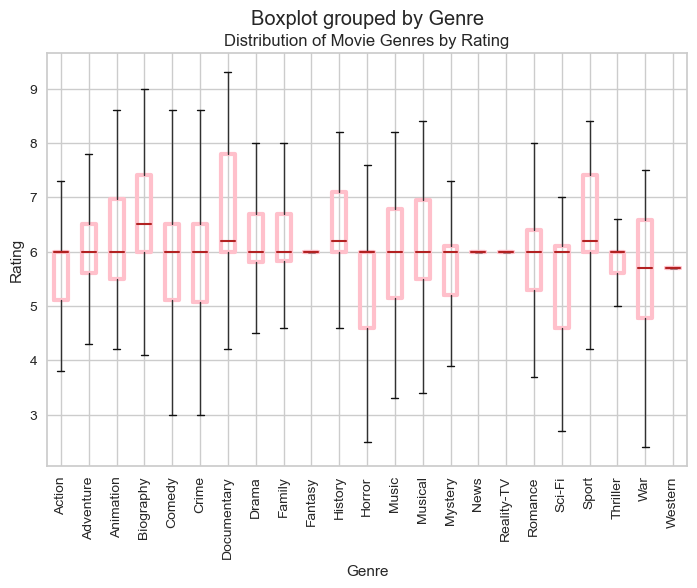

In [29]:
# Box plot of Ratings vs. Genre
boxprops = dict(linewidth=3, color='pink')
medianprops = dict(linewidth=1.5, color='firebrick')
df.boxplot(column='Rating', by='Genre',showfliers=False, rot=90, medianprops=medianprops,boxprops=boxprops)
plt.title('Distribution of Movie Genres by Rating')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

#### Observations:
-  Biography, Documentary, Sport movies have a tendency to get higher ratings
-  Horror and War movies have a tendency to get lower ratings
-  Other moveies have an average rating tendency (5-7)

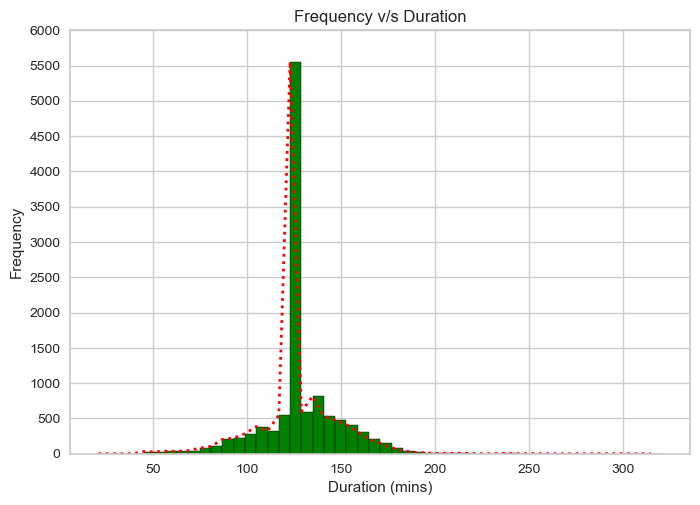

In [30]:
# Calculating the frequency of a movie with a particular duration 
frequency, bins = np.histogram(df['Duration'], bins=50)

# Plot a histogram of 'Frequency v/s Duration'
plt.hist(df['Duration'], bins=50, color='green', edgecolor='black')
plt.plot(bins[:-1], frequency, color='red', linestyle='dotted', linewidth=2)
plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.yticks(range(0, 6500, 500))
plt.title('Frequency v/s Duration')
plt.grid(True)
plt.show()

#### Observations:
-  Maximum movies have a duration between 100 minutes to 150 minutes (1.5 hr to 2.5 hr)

In [31]:
top_directors = df['Director'].value_counts().head(10) # Top 10 directors by number of movies directed

Director_table = top_directors.reset_index() # DataFrame with Director, Number of Movies and Average Rating
Director_table.columns = ['Director', 'Number of Movies']
Director_table.index = Director_table.index + 1

# Calculate the average movie rating for the top 10 directors
director_ratings = df.groupby('Director')['Rating'].mean().reindex(top_directors.index)
Director_table['Average Rating'] = Director_table['Director'].map(director_ratings)
Director_table['Average Rating'] = np.round(Director_table['Average Rating'],2).astype(float)

print("Top 10 directors by number of movies directed with their average rating")
print(Director_table)

Top 10 directors by number of movies directed with their average rating
                Director  Number of Movies  Average Rating
1             Kanti Shah                50            5.20
2           Mahesh Bhatt                46            5.53
3           David Dhawan                43            5.19
4   Hrishikesh Mukherjee                42            7.10
5            B.R. Ishara                40            5.99
6         Shakti Samanta                38            6.62
7        Babubhai Mistry                38            6.37
8        Ram Gopal Varma                35            5.51
9        Basu Chatterjee                35            6.63
10           Shibu Mitra                35            5.22


### Feature Engineering

Top 10 actor pairs by number of movies acted in
                       Actor Pair  Number of Movies
1              (Jeetendra, Rekha)                21
2       (Dharmendra, Hema Malini)                16
3         (Jaya Prada, Jeetendra)                15
4   (Ashok Kumar, Nalini Jaywant)                12
5     (Amit Pachori, Sapna Sappu)                11
6        (Hema Malini, Jeetendra)                11
7            (Dara Singh, Mumtaz)                11
8    (Fearless Nadia, John Cawas)                11
9          (Jeetendra, Reena Roy)                10
10           (Nargis, Raj Kapoor)                10


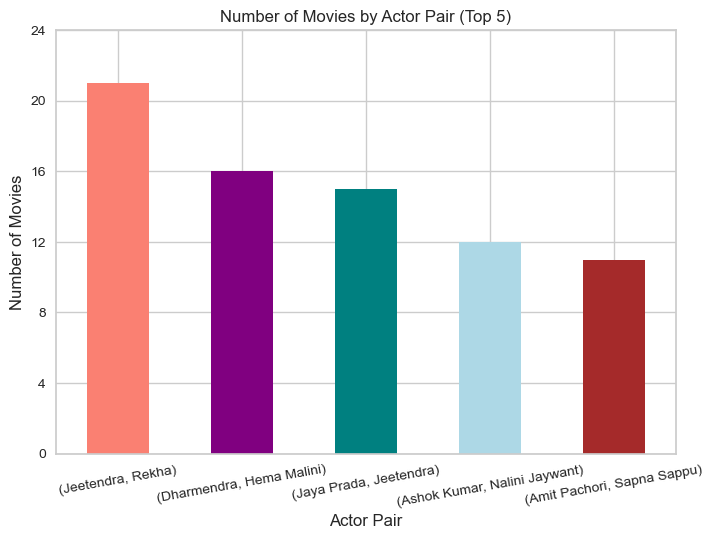

In [32]:
# Top Actor Pairs (Actor 1 and Actor 2) 
df['Actor Pair'] = df.apply(lambda x: tuple(sorted([x['Actor 1'], x['Actor 2']])), axis=1)

# Counting the Top 10 actor pairs by number of movies acted in
actor_pair_counts1 = df['Actor Pair'].value_counts().head(10)  
actor_pair_table = actor_pair_counts1.reset_index()
actor_pair_table.index = actor_pair_table.index + 1
actor_pair_table.columns = ['Actor Pair', 'Number of Movies']

print("Top 10 actor pairs by number of movies acted in")
print(actor_pair_table)

# Plotting the Top 5 actor pairs 
actor_pair_counts2 = df['Actor Pair'].value_counts().head(5) 
colors = ['salmon','purple','teal','lightblue','brown']
actor_pair_counts2.plot(kind='bar',color=colors)
plt.title('Number of Movies by Actor Pair (Top 5)')
plt.xlabel('Actor Pair',size=12)
plt.xticks(rotation=10,size=10)
plt.ylabel('Number of Movies',size=12)
plt.yticks(range(0, 25, 4))
plt.show()

In [33]:
# This feature will not be that helpfull for predicting the rating and using a tuple is complicating in model training
df.drop(['Actor Pair'],axis=1,inplace=True)

In [34]:
## Performing Target Encoding -- mean encoding (subsitute the data with mean values.)
df['Genre*'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Director*'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1*'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2*'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df.drop(columns=['Genre','Director','Actor 1','Actor 2'],inplace=True) ## Dropping the intial features
df['Rating'] = round(df['Rating'],1)
df.head(15)

,Year,Duration,Rating,Votes,Genre*,Director*,Actor 1*,Actor 2*
0,1917,128,6.7,22,5.9,6.4,6.7,6.7
1,1928,128,6.0,55,5.6,6.9,6.9,6.0
2,1931,120,6.0,55,6.1,6.0,5.8,6.1
3,1931,124,5.3,6,6.1,5.3,5.3,5.3
4,1931,124,6.2,112,6.1,6.2,5.7,6.2
5,1931,128,6.2,12,6.5,6.2,6.2,6.2
6,1931,128,6.0,55,6.1,4.9,5.4,6.0
7,1931,128,6.0,55,6.1,6.0,6.0,6.5
8,1931,128,6.0,55,5.9,6.0,6.0,6.0
9,1932,121,6.0,55,6.1,6.7,6.1,6.0


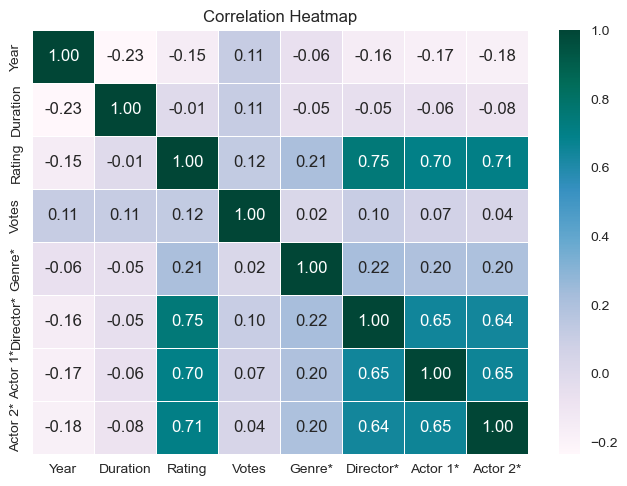

* is for Encoded


In [35]:
# Heat map of the correlation between the columns
sns.heatmap(df.corr(),cmap="PuBuGn", annot=True, linewidths=.5,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("* is for Encoded")

#### Observation:
- The Director, Actor 1, Actor 2 have a strong correlation with the rating, hence we can say that the rating does depend greatly on these features
- The Director and Genre also have  very mild correlation, meaning particular directors direct specific genre movies

In [36]:
# Dropping any random row, beacuse we need an even number of columns to equally split the dataset
i=np.random.randint(0,11580)
df= df.iloc[:i]

## Linear Regression Model

In [37]:
X=df.drop(columns="Rating",axis=1)
Y=df["Rating"]

In [38]:
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
# Split the data into training (80%) and temporary (20%) sets
X_train, x_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

# Split the temporary set into validation (10%) and test (10%) sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50)

In [40]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of Y_train is: ' + str(Y_train.shape))
print ('We have m = %d training examples' % (len(Y_train)))

The shape of X_train is: (7328, 7)
The shape of Y_train is: (7328,)
We have m = 7328 training examples


In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [42]:
# Predict and compute the validation accuracy
y_train_pred = linear_model.predict(X_train)
y_val_pred = linear_model.predict(x_val)
y_test_pred = linear_model.predict(x_test)
linear_r2=r2_score(y_test, y_test_pred)

print(f"R2 score of Training set : {r2_score(Y_train, y_train_pred)}")
print(f"R2 score of Testing set : {linear_r2}")
print(f"R2 score of the Validation set : {r2_score(y_val, y_val_pred)}")
print ("As the R2 score for training and cross validation are close and the testing R2 score is fair enough, model works")

R2 score of Training set : 0.6445902067820605
R2 score of Testing set : 0.6655523688980626
R2 score of the Validation set : 0.6594033789257961
As the R2 score for training and cross validation are close and the testing R2 score is fair enough, model works


In [43]:
y_pred =linear_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Linear MAE: {mae}, RMSE: {rmse}')

Linear MAE: 0.438143760542064, RMSE: 0.6137850829697564


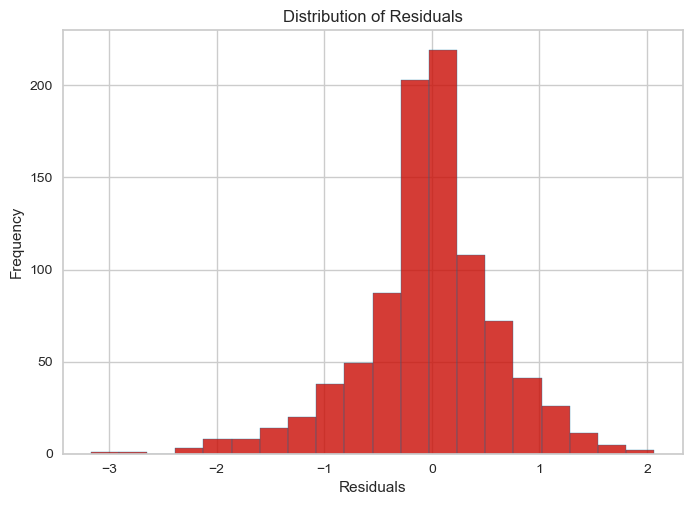

In [44]:
# Residuals Plot
residuals = y_val - y_val_pred
plt.hist(residuals, bins=20, color='r',edgecolor='b',alpha=0.8)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

#### Observation:
- The histogram appears to be approximately normally distributed with a peak around 0.
- This suggests that the model predictions are generally close to the observed values since most residuals are centered around 0.
- There are few residuals with values far from 0, indicating that there are not many large errors.
- The model is making accurate predictions for most data points.
- Overall, this histogram of residuals suggests that your regression model is performing well, with most predictions being close to the actual values and no significant bias present.

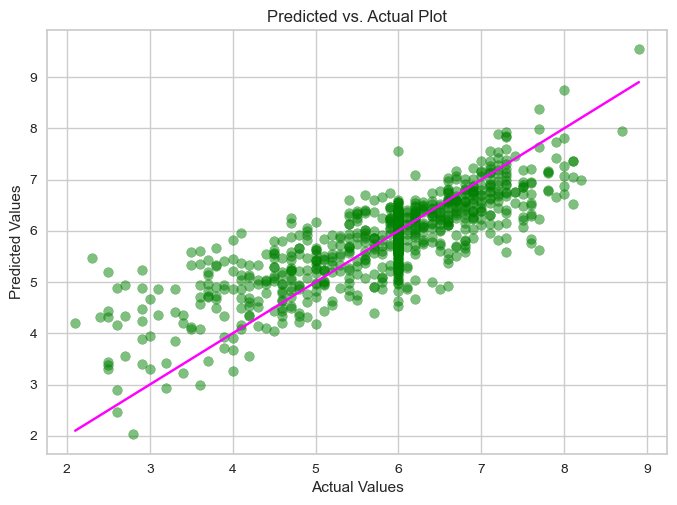

In [45]:
# Predicted vs. Actual Plot
plt.scatter(y_val, y_val_pred, alpha=0.5,color='green')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='magenta')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot')
plt.show()

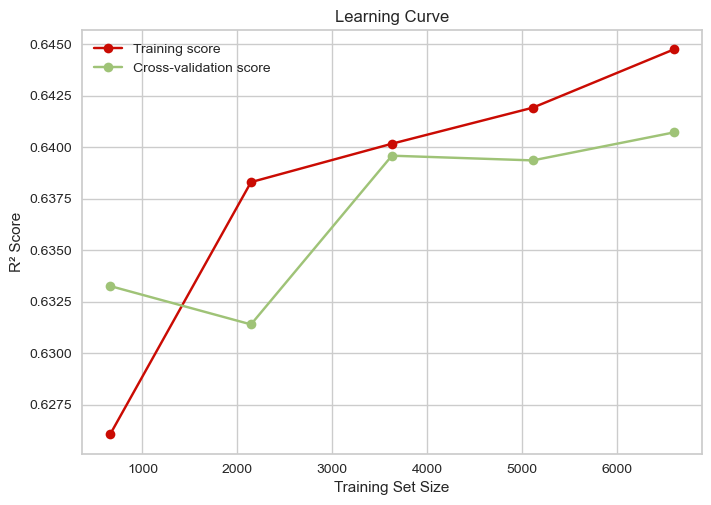

In [46]:
# Plotting A learning Curve
train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X_train, Y_train, cv=10, scoring='r2',n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [47]:
# Optimizing the model by other Regression Techniques

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2=r2_score(y_test, ridge_pred)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
lasso_pred = lasso_model.predict(x_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2=r2_score(y_test, lasso_pred)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(x_test)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
tree_r2=r2_score(y_test, tree_pred)


gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, Y_train)
gbr_pred = gbr_model.predict(x_test)
gbr_mae = mean_absolute_error(y_test, tree_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
gbr_r2=r2_score(y_test, gbr_pred)
                 
print(f'Ridge MAE: {ridge_mae}, RMSE: {ridge_rmse}')
print(f'Lasso MAE: {lasso_mae}, RMSE: {lasso_rmse}')
print(f'Decision Tree MAE: {tree_mae}, RMSE: {tree_rmse}')
print(f'Gradient Boosting MAE: {gbr_mae}, RMSE: {gbr_rmse}')


Ridge MAE: 0.43814228000492156, RMSE: 0.6137875604019216
Lasso MAE: 0.7517419874239621, RMSE: 1.0616402192923082
Decision Tree MAE: 0.5165938864628821, RMSE: 0.8479747256676811
Gradient Boosting MAE: 0.5165938864628821, RMSE: 0.5536851620381413


In [48]:
print(f"Linear R2: {linear_r2}")
print(f'Ridge R2:{ridge_r2}')
print(f'Lasso R2:{lasso_r2}')
print(f'Decision R2:{tree_r2}')
print(f'Gradient Boosting R2:{gbr_r2}')

Linear R2: 0.6655523688980626
Ridge R2:0.6655496690182054
Lasso R2:-0.0005762529742201483
Decision R2:0.36164644472869667
Gradient Boosting R2:0.7278419179265798


In [49]:
r2_score = {
    'Linear Regression':linear_r2,
    'Decision Tree Regression': tree_r2,
    'Ridge Regression': ridge_r2,
    'Lasso Regression': lasso_r2,
    'Gradient Boosting':gbr_r2
}

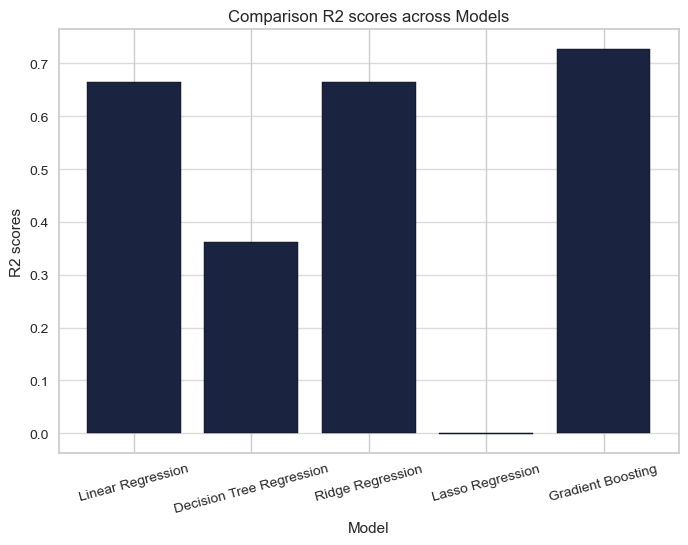

In [50]:
# Plot the R2 scores for different the different Regression Techniques.
colors=sns.set_palette("cubehelix")
plt.bar(r2_score.keys(),r2_score.values(),color=colors,edgecolor='black')
plt.xlabel('Model')
plt.ylabel('R2 scores')
plt.title('Comparison R2 scores across Models')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.7)
plt.show()

#### Observation: Gradient Boosting Gives the best R2 score, hence we will select that model for Regression

In [51]:
model_testing_data = {'Year': [2014], 'Duration': [121],'Genre*':[6.7],'Director*': [5.1], 'Actor 1*': [7.9], 'Actor 2*': [5.3],'Votes':[10000]}
mtdf = pd.DataFrame(model_testing_data)

predicted_rating = gbr_model.predict(mtdf)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 9.697391308282548


In [52]:
exp_name = setup(data = df,  target = 'Rating')

,Description,Value
0,Session id,6521
1,Target,Rating
2,Target type,Regression
3,Original data shape,"(9160, 8)"
4,Transformed data shape,"(9160, 8)"
5,Transformed train set shape,"(6412, 8)"
6,Transformed test set shape,"(2748, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [53]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3527,0.3159,0.5616,0.7238,0.0924,0.0689,0.0770
rf,Random Forest Regressor,0.3515,0.3304,0.5742,0.7114,0.0938,0.0683,0.3300
gbr,Gradient Boosting Regressor,0.3877,0.3321,0.5759,0.7096,0.0949,0.0755,0.1170
et,Extra Trees Regressor,0.3756,0.3630,0.6018,0.6832,0.0978,0.0726,0.2140
lr,Linear Regression,0.4406,0.4011,0.6328,0.6498,0.1034,0.0853,0.3000
ridge,Ridge Regression,0.4406,0.4011,0.6328,0.6498,0.1034,0.0853,0.0090
lar,Least Angle Regression,0.4410,0.4011,0.6328,0.6498,0.1034,0.0854,0.0090
br,Bayesian Ridge,0.4406,0.4011,0.6328,0.6498,0.1034,0.0853,0.0100
huber,Huber Regressor,0.4419,0.4155,0.6436,0.6370,0.1038,0.0859,0.0300
ada,AdaBoost Regressor,0.4947,0.4770,0.6904,0.5822,0.1123,0.0942,0.0680
